In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [71]:
def basis(n, b):
    B = np.zeros((n, n))
    for i in range(n):
        B[i, i] = b
        if i != n-1:
            B[i+1, i] = -1
    return B

def voronoi_relevant_vectors(n, b):
    B = basis(n, b)
    result = []
    for i in range(n):
        for j in range(i, n):
            v = np.zeros(n)
            for k in range(i, j+1):
                v[k] = 1
            result.append(B @ v)
            result.append(-B @ v)
    return result

def unit_vector(n, i):
    e = np.zeros(n)
    e[i] = 1
    return e

In [72]:
# defines the linear programming problem for facet i of the extended fundamental parallelepiped (B[-1,1]^n)
def problem(n, b, i, sign):
    B = basis(n, b)
    B_inv = np.linalg.inv(B)
    relvecs = voronoi_relevant_vectors(n, b)
    
    x = cp.Variable(n)
    # the objective is finding the maximum value in dimension i
    # among all points in the Voronoi cell
    objective = cp.Maximize(sign * B_inv @ x @ unit_vector(n, i) - 1)
    # constrain x to be inside the Voronoi cell
    constraints = list(map(lambda v: x @ v <= v @ v / 2, relvecs))
    prob = cp.Problem(objective=objective, constraints=constraints)
    return x, prob

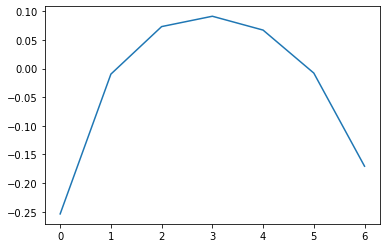

0.0913085936650826

In [77]:
# i is the variable
n = 7
b = 2
i_list = range(n)
vals = []
for i in i_list:
    x, prob = problem(n, b, i, 1)
    prob.solve()
    vals.append(prob.value)
plt.plot(i_list, vals)
plt.show()
np.max(vals)